In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams['lines.linewidth'] = 1
warnings.simplefilter(action='ignore', category=FutureWarning)



# **Implementing the CAPM in Python**
** CAPM: Capital Asset Pricing Model 


1.   Market portfolio (S&P 500 index) - Tangent portfolio (CML & Efficient frontier) 
2.   Individual asset's return-risk(volatility) 



How to do it...

1.   Import the libraries:



In [3]:
import pandas as pd
# !pip install yfinance 
import yfinance as yf
import statsmodels.api as sm


2.   Specify the risky asset and the time horizon:


In [4]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2014-01-01'
END_DATE = '2018-12-31'

In [5]:

df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 1257 rows of data.



3. Resample to monthly data and calculate simple returns:




In [6]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()
X.head()

,asset,market
Date,,
2014-02-28 00:00:00-05:00,0.009507,0.043117
2014-03-31 00:00:00-04:00,-0.071058,0.006932
2014-04-30 00:00:00-04:00,-0.095847,0.006201
2014-05-31 00:00:00-04:00,0.027685,0.021030
2014-06-30 00:00:00-04:00,0.039130,0.019058



4. Calculate beta using the covariance approach:



In [7]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance 
beta

1.6296082618965537

5. Prepare the input and estimate CAPM as a linear regression:

In [8]:
X

,asset,market
Date,,
2014-02-28 00:00:00-05:00,0.009507,0.043117
2014-03-31 00:00:00-04:00,-0.071058,0.006932
2014-04-30 00:00:00-04:00,-0.095847,0.006201
2014-05-31 00:00:00-04:00,0.027685,0.021030
2014-06-30 00:00:00-04:00,0.039130,0.019058
2014-07-31 00:00:00-04:00,-0.036302,-0.015080
2014-08-31 00:00:00-04:00,0.083229,0.037655
2014-09-30 00:00:00-04:00,-0.048962,-0.015514
2014-10-31 00:00:00-04:00,-0.052661,0.023201


In [9]:
sm.add_constant(X)

,const,asset,market
Date,,,
2014-02-28 00:00:00-05:00,1.0,0.009507,0.043117
2014-03-31 00:00:00-04:00,1.0,-0.071058,0.006932
2014-04-30 00:00:00-04:00,1.0,-0.095847,0.006201
2014-05-31 00:00:00-04:00,1.0,0.027685,0.021030
2014-06-30 00:00:00-04:00,1.0,0.039130,0.019058
2014-07-31 00:00:00-04:00,1.0,-0.036302,-0.015080
2014-08-31 00:00:00-04:00,1.0,0.083229,0.037655
2014-09-30 00:00:00-04:00,1.0,-0.048962,-0.015514
2014-10-31 00:00:00-04:00,1.0,-0.052661,0.023201


In [10]:
# OLS REGRESSION equation: y = a + bx 
# y: individual stock return (AMZN)
# x: market average stock return (^GSPC)

# 추정하고 싶은 변수 (estimate): a, b 
# a: y의 절편 
# **b**: y와 x의 선형 관계를 나타내는 계수 

# separate target (종속변수: 왼편에 놓이는 변수)
y = X.pop('asset')

# y = a*1 + b*x (scalar)
# Y (Nx 1 행렬) = [1 X] X [a b]' {(N * 2 행렬) X (2x1 행렬)} 

# add constant 
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y,X).fit()

# print results 
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     32.77
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.05e-07
Time:                        02:03:16   Log-Likelihood:                 75.313
No. Observations:                  59   AIC:                            -146.6
Df Residuals:                      57   BIC:                            -142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.009      1.950      0.0

### **There's more...**

**Risk-free rate (13 Week Treasury Bill)**

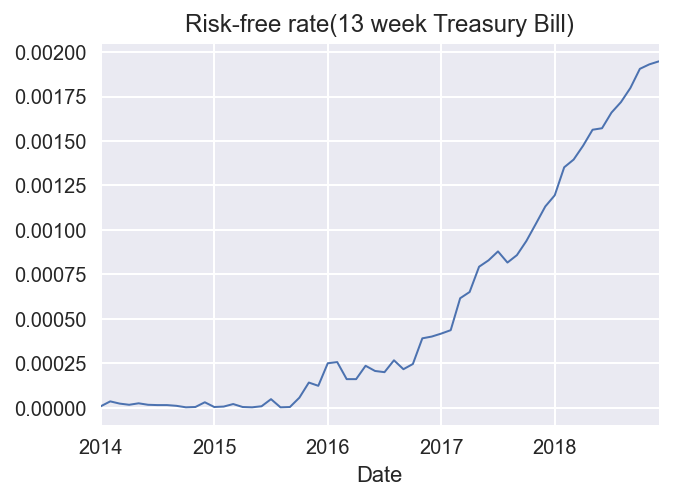

In [11]:
# period lenght in days
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download('^IRX',
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample('M').last().Close / 100

# calculate the corresponding daily risk-free return  
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# convert to monthly and subtract 1
rf = (rf ** 30) - 1

# plot the risk-free rate
rf.plot(title = 'Risk-free rate(13 week Treasury Bill)')
plt.show()

**Risk-free rate (3-Month Treasury Bill)**

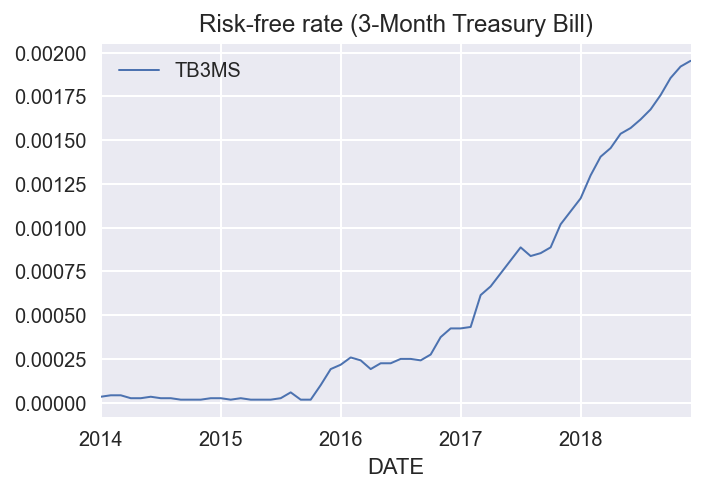

In [12]:
import pandas_datareader.data as web

# download the data 
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, end=END_DATE)

# convert to monthly
rf = (1 + (rf / 100)) ** (1 / 12) - 1

# plot the risk-free rate
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()

# **Monte Carlo simulations in finance**

**Simulating stock price dynamics using Geometric Brownian Motion**

How to do it...

1.   Import libararies: 

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf

In [24]:
RISKY_ASSET = 'MSFT'
START_DATE = '2019-01-01'
END_DATE = '2019-07-31'

In [25]:
df = yf.download(RISKY_ASSET, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  1 of 1 completed
Downloaded 145 rows of data.



2. Calculate daily returns:


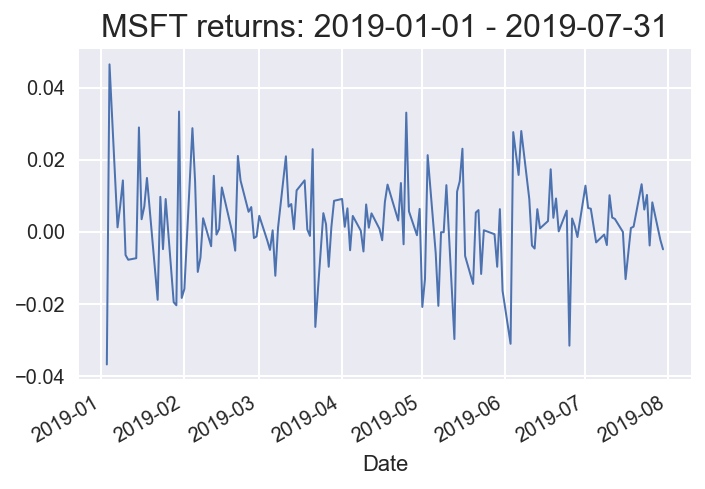

Average return: 0.24%


In [26]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()


ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)

plt.tight_layout()
# plt.savefig('images/ch6_im1.png')
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')

2. Split data into the training and test sets:

In [17]:
train = returns['2019-01-01':'2019-06-30']
test = returns['2019-07-01':'2019-07-31']

3. Specify the parameters of the simulation:

In [27]:
T = len(test)
N = len(test) 
s_0 = adj_close[train.index[-1]]
N_SIM = 100 
mu = train.mean()
sigma = train.std()

4. Define the function used for simulations:

In [28]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time.
    '''
    np.random.seed(random_seed)

    dt = T/N 
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis =1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)

    return S_t

5. Run the simulations

In [29]:
gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

6. Plot simulation results:

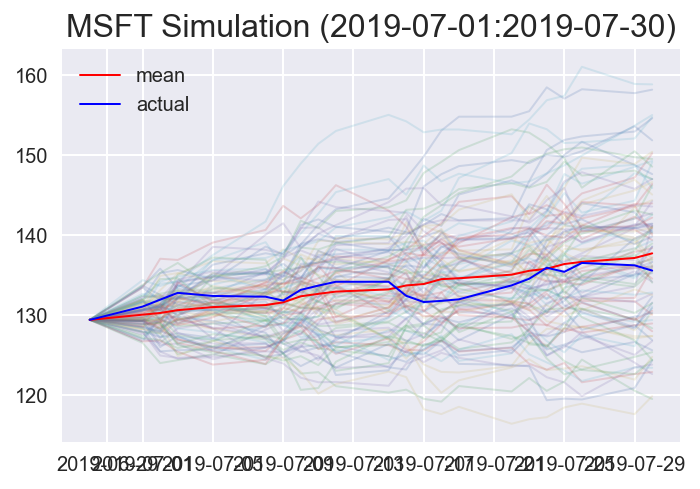

In [30]:

# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation '
              f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
#plt.savefig('images/ch6_im2.png')
plt.show()

There's **more**

In [22]:
%timeit gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

NameError: name 'S_0' is not defined


## **Estimating Value-at-risk (VaR) using Monte Carlo**

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [ ]:
# set random seed for reproducibility
np.random.seed(42)

1. Define the parameters that will be used for this exercise:

In [ ]:
RISKY_ASSETS = ['GOOG', 'FB']
SHARES = [5, 5]
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
T = 1
N_SIMS = 10 ** 5

2. Download data from Yahoo Finance:

In [ ]:
df = yf.download(RISKY_ASSETS, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')

In [ ]:
df.head()

3. Calculate daily returns:

In [ ]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
plot_title = f'{" vs. ".join(RISKY_ASSETS)} returns: {START_DATE} - {END_DATE}'
returns.plot(title=plot_title)

plt.tight_layout()
# plt.savefig('images/ch6_im3.png')
plt.show()

print(f'Correlation between returns: {returns.corr().values[0,1]:.2f}')

4. Calculate the covariance matrix:

In [ ]:
cov_mat = returns.cov()
cov_mat

5. Perform the Cholesky decomposition of the covariance matrix:

In [ ]:
import numpy as np
import pprint 
import scipy 
import scipy.linalg # SciPy Linear Algebra Library 

A = scipy.array([[6,3,4,8], [3,6,5,1],[4,5,10,7],[8,1,7,25]])

#L = np.linalg.cholesky(A) 
#U = L.T

L = scipy.linalg.cholesky(A, lower=True)
U = scipy.linalg.cholesky(A, lower=False)

P = np.dot(L, U) 

print("A:")
pprint.pprint(A) 

print("L:")
pprint.pprint(L)

print("U:")
pprint.pprint(U) 

print("P:")
pprint.pprint(P) 

In [ ]:
chol_mat = np.linalg.cholesky(cov_mat)
chol_mat

6. Draw correlated random numbers from Standard Normal distribution:

In [ ]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

7. Define metrics used for simulations:

In [ ]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1,:]
P_0 = np.sum(SHARES * S_0)

8. Calculate the terminal price of the considered stocks:

In [ ]:
 S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + 
                   sigma * np.sqrt(T) * correlated_rv)

9. Calculate the terminal portfolio value and calculate the portfolio returns:

In [ ]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0 

10. Calculate VaR:

In [ ]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

for x, y in zip(percentiles, var): 
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

In [ ]:
ax = sns.distplot(P_diff,kde=False)
ax.set_title('''Distribution of possible `1-day changes in portfolio value
              1-day 99% VaR''', fontsize=12)
ax.axvline(var[2], 0, 10000)
ax.axvline(var[0], 0, 10000)

plt.tight_layout()
plt.show()